In [1]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
from math import ceil

In [2]:
rows=ceil(46.0/3*7)
# cols=8*4-1
cols=32
print(rows,cols)

buffer_h=1000
buffer_w=100
bead_space_x= 70
bead_space_y= 100
bead_x=50
bead_y=50
# bead_y=80

h = rows*bead_space_y + buffer_h
w = cols*bead_space_x + buffer_w

np_mat=np.ones((h, w, 3), np.uint8)
np_mat=np_mat*255

108 32


In [3]:
# starting bead
# start_pos=(0,0)
start_pos=(80,80)
cv2.rectangle(np_mat, start_pos,(start_pos[0]+bead_x,start_pos[1]+bead_y) , (255,0,0), 10);

In [4]:
turn_clr=(0,0,0)
# turn_clr=(150,150,150)
y_space=25
for row in range(1,rows+1):
    if row % 2 == 0:
        row_clr=(150,150,150)
        # turning part (2 side beads)
        seed_pos=(start_pos[0]-(bead_x+10), start_pos[1]+row*(bead_y+y_space)+bead_y//2+30)
        cv2.rectangle(np_mat, seed_pos,(seed_pos[0]+bead_x,seed_pos[1]+bead_y) , turn_clr, 10);
        seed_pos=(start_pos[0]-(bead_x+10), start_pos[1]+row*(bead_y+y_space)-bead_y//2+30)
        cv2.rectangle(np_mat, seed_pos,(seed_pos[0]+bead_x,seed_pos[1]+bead_y) , turn_clr, 10);
    else:
        row_clr=(0,0,0)
    for col in range(0,cols):
#     for col in range(1,cols+1):
        if row%2==0:
            if col%4 ==0:
                continue
        else:
            if (col+2)%4 ==0:
                continue
        if col %2 == 0:
            seed_pos=(start_pos[0]+col*(bead_x+10), start_pos[1]+row*(bead_y+y_space)+bead_y//2)
        else:
            seed_pos=(start_pos[0]+col*(bead_x+10), start_pos[1]+row*(bead_y+y_space))
        cv2.rectangle(np_mat, seed_pos,(seed_pos[0]+bead_x,seed_pos[1]+bead_y) , row_clr, 10);
        


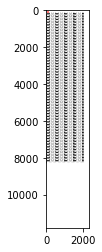

In [5]:
plt.imshow(np_mat)
plt.show()

In [6]:
im_bgr = cv2.cvtColor(np_mat, cv2.COLOR_RGB2BGR)
cv2.imwrite("bookmark_size.jpg", im_bgr)

True